In [ ]:
import numpy as np
import pandas as pd
from operator import sub
import matplotlib.pyplot as plt
import regex as re
!pip install rdkit
import rdkit
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 13.9 MB/s eta 0:00:00


In [ ]:
#SMILES:
methyl_butanoate = 'CCCC(=O)OC'
methyl_crotonate = 'CC=CC(=O)OC'
hexene_3 = 'CCC=CCC'
dodecane = 'CCCCCCCCCCCC'
decane = 'CCCCCCCCCC'
heptane = 'CCCCCCC'
methyl3nonenoate = 'CCCCCC=CCC(=O)OC'
methyl5decenoate = 'CCCCC=CCCCC(=O)OC'
methyl_oleate = 'CCCCCCCCC=CCCCCCCCC(=O)OC'
methyl_linoleate = 'CCCCCC=CCC=CCCCCCCCC(=O)OC'
methyl_palmiate = 'CCCCCCCCCCCCCCCC(=O)OC'
methyl_stearate = 'CCCCCCCCCCCCCCCCCC(=O)OC'
Gondoic_ester = 'CCCCCCCC=CCCCCCCCCCC(=O)OC'
methyl_linolenate = 'CCC=CCC=CCC=CCCCCCCCC(=O)OC'
s = 'CC=CC(=O)OC'

In [ ]:
#Composition = [oleate,linoleate,linolenate,palmiate,stearate]
rapeseed = [0.599,0.211,0.132,0.043,0.013] # westbrook US NREL
soybean = [0.388,0.432,0,0.167,0.013] # Ang li 2019
waste_cooking_oil = [0.49, 0.238, 0, 0.237, 0.035]  # Ang li 2019
canola = [0.604,0.212,0.096,0.02,0.042] # Hoekman 2012
Palm = [0.4347, 0.1802, 0, 0.2809, 0.0953] # Hoang 2013
soy_wang = [0.343, 0.226, 0.025, 0.184, 0.088] # Wang 2014
fat_wang = [0.233, 0.523, 0, 0.107, 0.043] # wang 2014

In [ ]:
def find_group(s):
    double_bonds = len(re.findall(r'C=C',s))
    #------------------------------------------------------
    iter = re.finditer(r"C=C", s)
    indices = set()
    for m in iter:
        if m.start(0) == 0:
            indices.add(m.end(0))
        if m.end(0) == len(s):
            indices.add(m.start(0) - 1)
        if m.start(0) != 0 and m.end(0) != len(s):
            indices.add(m.start(0)-1)
            indices.add(m.end(0))
    try:
        indices.remove(s.find("C(=O)OC",0,len(s)))
    except Exception:
        print("_________")
    allylic = len(indices)
    #------------------------------------------------------
    if 0 in indices or len(s)-1 in indices:
        CH3 = len(re.findall(r'^CC|CC$',s,overlapped=True)) - 1
    else:
        CH3 = len(re.findall(r'^CC|CC$',s,overlapped=True))
    #--------------------------------------------------------
    if CH3 == 2:
        new = s[1:-1]
    elif CH3 == 1:
        if s[:2] == 'CC':
            new = s[1:]
        else:
            new = s[:-1]
    else:
        new = s
    new = new.replace("C(=O)OC","")
    new = new.replace("C=C","")
    if 0 in indices or len(s)-1 in indices:
        CH2 = len(new) - allylic + len(re.findall(r'^CC=C|C=CC$',s)) - 1
    else:
        CH2 = len(new) - allylic + len(re.findall(r'^CC=C|C=CC$',s))
    #--------------------------------------------------------------------
    max_length = 0
    current_length = 0
    string = s.replace("C(=O)OC","")
    string = s.replace("C=C","=")
    for char in string:
        if char == 'C':
            current_length += 1
        else:
            max_length = max(max_length, current_length)
            current_length = 0
    max_length = max(max_length, current_length)
    #--------------------------------------------------------------
    COOCH3 = s.count('C(=O)OC',0,len(s)) + s.count('COC(=O)',0,len(s))

    C = len(re.findall(r'C',s))
    O = len(re.findall(r'O',s))
    my_mol = Chem.MolFromSmiles(s)
    H_string = rdMolDescriptors.CalcMolFormula(my_mol)
    try:
        H = int(re.findall("(?<=H)(.*?)(?=O)",H_string)[0])
    except Exception:
        H = int(re.findall("[^H]*",H_string)[2])
    return [CH3,CH2,allylic,double_bonds,COOCH3,C,H,O]

In [ ]:
s = methyl_oleate
print(s)
max_length = 0
current_length = 0
s = s.replace("C(=O)OC","")
s = s.replace("C=C","=")
print(s)
for char in s:
    if char == 'C':
        current_length += 1
    else:
        max_length = max(max_length, current_length)
        current_length = 0
max_length = max(max_length, current_length)
print(max_length)


CCCCCCCCC=CCCCCCCCC(=O)OC
CCCCCCCC=CCCCCCC
8


In [ ]:
y = find_group(methyl3nonenoate)
print(y)
print(methyl3nonenoate)

_________
[1, 3, 2, 1, 1, 10, 18, 2]
CCCCCC=CCC(=O)OC


In [ ]:
#mixture = {methyl_oleate:0.26,decane:0.74}
mixture = {methyl_palmiate:0.26,decane:0.74}
matrix = []
comp = []
for smile in mixture:
    print(smile,mixture[smile])
    comp.append(mixture[smile])
    matrix.append(find_group(smile))

y = np.asarray(comp) @ np.asarray(matrix)
print(y)

CCCCCCCCCCCCCCCC(=O)OC 0.26
_________
CCCCCCCCCC 0.74
_________
[ 1.74  9.56  0.    0.    0.26 11.82 25.12  0.52]


In [ ]:
Biodiesel_comp = [methyl_oleate,methyl_linoleate,methyl_linolenate,methyl_palmiate,methyl_stearate]
Target_fuel = fat_wang
matrix = []
for smile in Biodiesel_comp:
    print(smile)
    matrix.append(find_group(smile))

y = np.asarray(Target_fuel) @ np.asarray(matrix)
#y = [1.7,6.827,0.6216,0.3756,0.3,10.499,21.648,0.6] # soy+hept
#y = [1.7,7.07,0.5082,0.2898,0.3,10.4578,20.836,0.6] # wco+hept
#y = [1,11.595,2.117,1.132,1,18.976,35.688,2] # 0.7oleate+0.3RME
print(y)

CCCCCCCCC=CCCCCCCCC(=O)OC
_________
CCCCCC=CCC=CCCCCCCCC(=O)OC
_________
CCC=CCC=CCC=CCCCCCCCC(=O)OC
_________
CCCCCCCCCCCCCCCC(=O)OC
_________
CCCCCCCCCCCCCCCCCC(=O)OC
_________
[ 0.906  9.689  2.035  1.279  0.906 17.    31.442  1.812]


## Surrogate components: methyl butanoate, 3-hexene, Dodecane

In [ ]:
surrogate_components = [methyl_butanoate,hexene_3,dodecane]
matrix = []
for smile in surrogate_components:
    print(smile)
    matrix.append(find_group(smile))
x = np.asarray(matrix).T

CCCC(=O)OC
_________
CCC=CCC
_________
CCCCCCCCCCCC
_________


MB, 3-hexene, Dodecane
[0.57892125 0.3634292  0.05764955]
[0.57362006 0.36613065 0.06024929]
[0.5684936  0.36871239 0.06279401]
[0.56353312 0.3711807  0.06528618]
[0.55873045 0.37354142 0.06772813]
[0.55407796 0.37580002 0.07012202]
[0.54956849 0.37796162 0.0724699 ]
[0.54519534 0.380031   0.07477365]
[0.54095224 0.38201267 0.07703509]
[0.53683327 0.38391083 0.0792559 ]


Text(0, 0.5, 'moles')

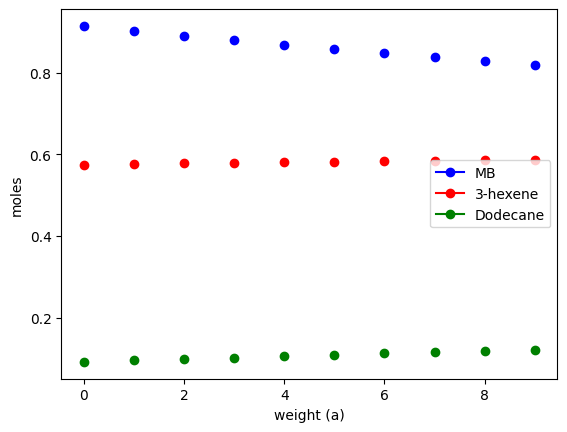

In [ ]:
collect = []
unsat = []
temp = 10
print("MB, 3-hexene, Dodecane")
plt.figure()
for a in range(0,10):
    lambda_val = a/10
    # Perform ridge regression using np.linalg.lstsq
    ATA = np.dot(x.T, x)
    ATy = np.dot(x.T, y)
    A_ridge = np.vstack((x, np.sqrt(lambda_val) * np.eye(x.shape[1])))
    y_ridge = np.concatenate((y, np.zeros(x.shape[1])))
    x_ridge, residuals, rank, s = np.linalg.lstsq(A_ridge, y_ridge, rcond=None) # (A^T * A) * x = (A^T * b)
    print(x_ridge/sum(x_ridge))
    c = np.array(y)-np.array(x @ x_ridge)

    collect.append([a,sum(abs(c))])
    unsat.append([a,np.array(x @ x_ridge)[2]])
    surrogate_composition = x_ridge
    solution = np.array(x @ x_ridge)
    if sum(abs(c)) < temp:
        temp = sum(abs(c))
        solution = np.array(x @ x_ridge)
        surrogate_composition = x_ridge
    plt.plot(a, x_ridge[0],'-ob')
    plt.plot(a, x_ridge[1],'-or')
    plt.plot(a, x_ridge[2],'-o', color = 'green')

plt.legend(["MB", "3-hexene","Dodecane"])
plt.xlabel("weight (a)")
plt.ylabel("moles")
###############################


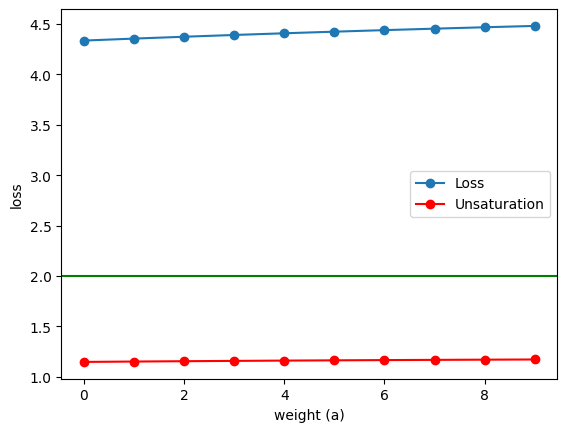

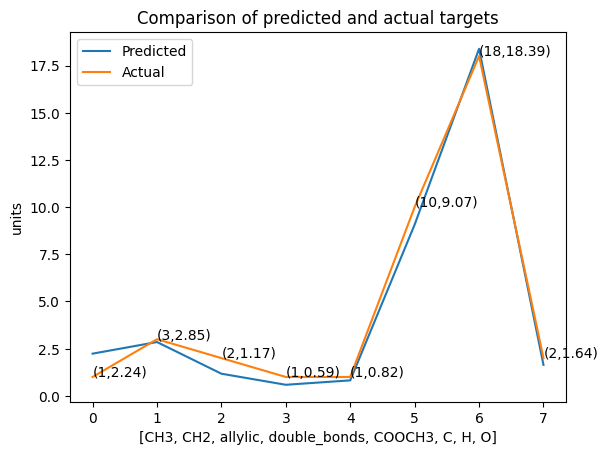

Surrogate composition of  ['CCCC(=O)OC', 'CCC=CCC', 'CCCCCCCCCCCC']
[0.53683327 0.38391083 0.0792559 ]


In [ ]:
def plot_analysis(collect,unsat,y,solution):
    plt.show()
    plt.figure()
    plt.plot(np.array(collect).transpose()[0],np.array(collect).transpose()[1],'-o')
    plt.plot(np.array(unsat).transpose()[0],np.array(unsat).transpose()[1],'-or')
    plt.axhline(y = y[2],color = "green")
    plt.legend(["Loss", "Unsaturation"])
    plt.xlabel("weight (a)")
    plt.ylabel("loss")
    plt.show()
    ###############################
    plt.figure()
    plt.title("Comparison of predicted and actual targets")
    plt.plot(solution)
    plt.plot(y)
    plt.legend(["Predicted", "Actual"],loc='upper left')
    plt.xlabel("[CH3, CH2, allylic, double_bonds, COOCH3, C, H, O]")
    plt.ylabel("units")
    for i_x, i_y, sol in zip(range(0,len(y)+1), y, solution):
        plt.text(i_x, i_y, '({},{})'.format(round(i_y,2),round(sol,2)))
    plt.show()
    ############################
    print("Surrogate composition of ",surrogate_components)
    print(surrogate_composition/sum(surrogate_composition))
plot_analysis(collect,unsat,y,solution)

## Surrogate components: methyl crotonate, dodecane

In [ ]:
surrogate_components = [methyl_crotonate,dodecane]
matrix = []
for smile in surrogate_components:
    print(smile)
    matrix.append(find_group(smile))
x = np.asarray(matrix).T
print(x)

CC=CC(=O)OC
CCCCCCCCCCCC
_________
[[ 0  2]
 [ 0 10]
 [ 1  0]
 [ 1  0]
 [ 1  0]
 [ 5 12]
 [ 8 26]
 [ 2  0]]


MB2D,Dodecane
[0.79189858 0.20810142]
[0.79016884 0.20983116]
[0.78845002 0.21154998]
[0.78674202 0.21325798]
[0.78504473 0.21495527]
[0.78335806 0.21664194]
[0.78168191 0.21831809]
[0.78001618 0.21998382]
[0.77836077 0.22163923]
[0.77671559 0.22328441]


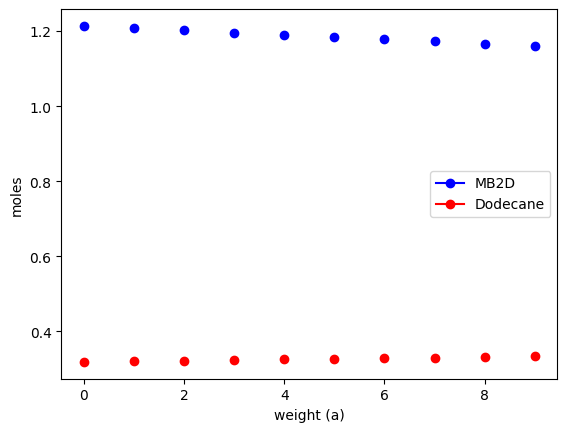

In [ ]:
temp = 20
collect = []
unsat = []
print("MB2D,Dodecane")
plt.figure()

for a in range(0,10):
    lambda_val = a/10
    # Perform ridge regression using np.linalg.lstsq
    ATA = np.dot(x.T, x)
    ATy = np.dot(x.T, y)
    A_ridge = np.vstack((x, np.sqrt(lambda_val) * np.eye(x.shape[1])))
    y_ridge = np.concatenate((y, np.zeros(x.shape[1])))
    x_ridge, residuals, rank, s = np.linalg.lstsq(A_ridge, y_ridge, rcond=None) # (A^T * A) * x = (A^T * b)
    print(x_ridge/sum(x_ridge))
    c = np.array(y)-np.array(x @ x_ridge)

    collect.append([a,sum(abs(c))])
    unsat.append([a,np.array(x @ x_ridge)[2]])
    surrogate_composition = x_ridge
    solution = np.array(x @ x_ridge)
    if sum(abs(c)) < temp:
        temp = sum(abs(c))
        solution = np.array(x @ x_ridge)
        surrogate_composition = x_ridge
    plt.plot(a, x_ridge[0],'-ob')
    plt.plot(a, x_ridge[1],'-or')
plt.legend(["MB2D","Dodecane"])
plt.xlabel("weight (a)")
plt.ylabel("moles")
plt.show()

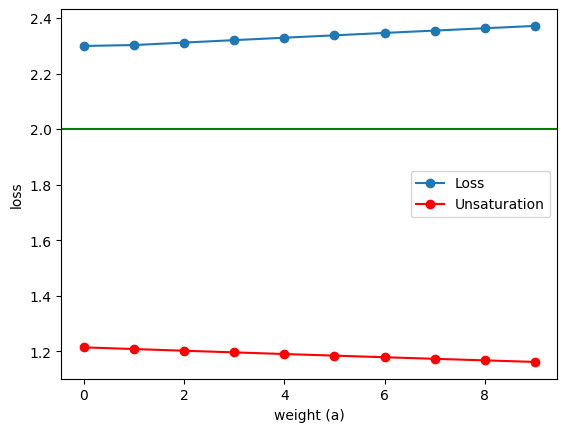

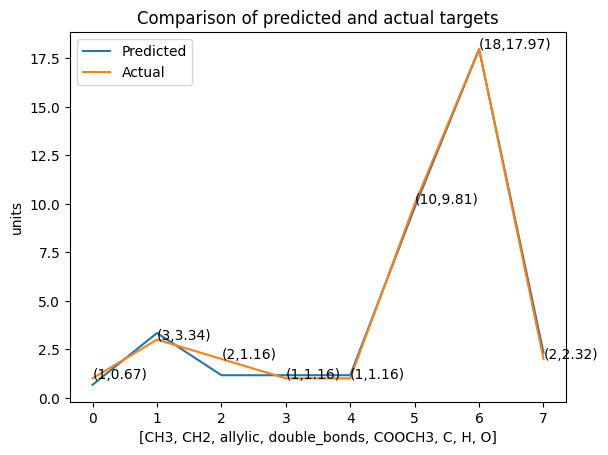

Surrogate composition of  ['CC=CC(=O)OC', 'CCCCCCCCCCCC']
[0.77671559 0.22328441]


In [ ]:
plot_analysis(collect,unsat,y,solution)

## Surrogate components: methyl butanoate, dodecane

In [ ]:
surrogate_components = [methyl_butanoate,dodecane]
matrix = []
for smile in surrogate_components:
    print(smile)
    matrix.append(find_group(smile))
x = np.asarray(matrix).T
print(x)

CCCC(=O)OC
_________
CCCCCCCCCCCC
_________
[[ 1  2]
 [ 2 10]
 [ 0  0]
 [ 0  0]
 [ 1  0]
 [ 5 12]
 [10 26]
 [ 2  0]]


MB+Dodecane
Fractions :  [0.92514395 0.07485605] [1.48765432 0.12037037]
Predicted :  [ 1.72839506  4.17901235  0.          0.          1.48765432  8.88271605
 18.00617284  2.97530864]
Actual :  [1, 3, 2, 1, 1, 10, 18, 2]
difference :  [-0.72839506 -1.17901235  2.          1.         -0.48765432  1.11728395
 -0.00617284 -0.97530864]
loss :  7.493827160493824


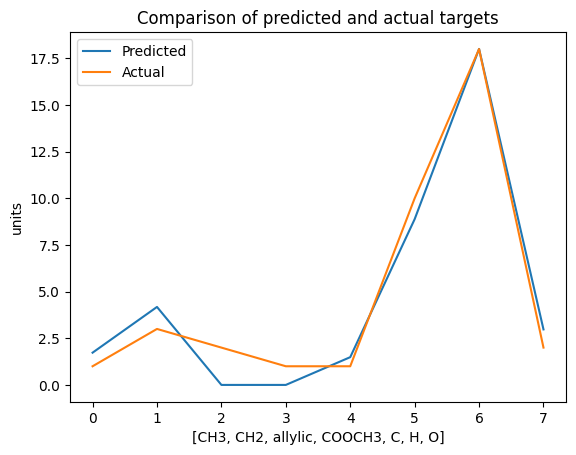

In [ ]:
print("MB+Dodecane")
ans = np.linalg.lstsq(x,y, rcond=2)
#print("value :", x @ ans[0])
print("Fractions : ",ans[0]/sum(ans[0]),ans[0])
print("Predicted : ", np.array(x @ ans[0]))
c = np.array(y)-np.array(x @ ans[0])
print("Actual : ", y)
print("difference : ",c)
print("loss : ",sum(abs(c)))
####################################
plt.figure()
plt.title("Comparison of predicted and actual targets")
plt.plot( np.array(x @ ans[0]))
plt.plot(y)
plt.legend(["Predicted", "Actual"])
plt.xlabel("[CH3, CH2, allylic, COOCH3, C, H, O]")
plt.ylabel("units")
plt.show()